Spatial aggregation. [4 Marks]


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

SyntaxError: invalid non-printable character U+00A0 (<string>, line 1)

In [41]:
#1
df = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")
grouped_avg_pm25 = df.groupby('state')['PM2.5'].mean()
highest_avg_state = grouped_avg_pm25.idxmax()
highest_avg_value = grouped_avg_pm25.max()
print(f"State with highest average PM2.5 concentration: {highest_avg_state} ({highest_avg_value:.2f} µg/m³)")

State with highest average PM2.5 concentration: Delhi (104.10 µg/m³)


In [42]:
#2
df.rename(columns={'Timestamp': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if df['Date'].isna().any():
    print("There are some invalid date values in your data that could not be converted.")

df_2023 = df[df['Date'].dt.year == 2023]

# Count unique dates with PM2.5 > 300 per state
hazardous_days = df_2023[df_2023['PM2.5'] > 300].groupby('state')['Date'].nunique()

most_hazardous_state = hazardous_days.idxmax()
most_hazardous_days = hazardous_days.max()

print(f"State with most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")

State with most hazardous PM2.5 days in 2023: Delhi (49 days)


In [43]:
#3
if 'Date' in df.columns:
    pm25_variability = df_2023.groupby('state')['PM2.5'].std()
    highest_var_state = pm25_variability.idxmax()
    highest_var_value = pm25_variability.max()
    print(f"State with highest variability in PM2.5 in 2023: {highest_var_state} (Std Dev: {highest_var_value:.2f})")

State with highest variability in PM2.5 in 2023: Delhi (Std Dev: 82.80)


In [44]:
#4
if 'Date' in df.columns:
    df_covid = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2021)]
    covid_avg_pm25 = df_covid.groupby('state')['PM2.5'].mean()
    lowest_avg_state_covid = covid_avg_pm25.idxmin()
    lowest_avg_value_covid = covid_avg_pm25.min()
    print(f"State with lowest average PM2.5 levels during Covid (2020-2021): {lowest_avg_state_covid} ({lowest_avg_value_covid:.2f} µg/m³)")

State with lowest average PM2.5 levels during Covid (2020-2021): Mizoram (14.32 µg/m³)


Temporal Aggregation [3 Marks]


In [45]:
#1
df_aug_2020 = df[(df['Date'].dt.year == 2020) & (df['Date'].dt.month == 8)]
highest_pm25_station = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax(), 'station']
highest_pm25_value = df_aug_2020['PM2.5'].max()
print(f"Station with highest PM2.5 in August 2020: {highest_pm25_station} ({highest_pm25_value:.2f} µg/m³)")

Station with highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


In [46]:
#2
df_2018 = df[(df['Date'].dt.year == 2018) & 
             (df['station'].isin(['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']))]

seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

seasonal_avg = {}
for season, months in seasons.items():
    seasonal_avg[season] = df_2018[df_2018['Date'].dt.month.isin(months)]['PM2.5'].mean()

highest_pollution_season = max(seasonal_avg, key=seasonal_avg.get)
print(f"Season with highest pollution in 2018: {highest_pollution_season} ({seasonal_avg[highest_pollution_season]:.2f} µg/m³)")

Season with highest pollution in 2018: Winter (67.49 µg/m³)


Potential factors for seasonal pollution variation:
1. Winter inversion trapping pollutants.
2. Increased vehicular emissions in colder months.
3. Summer heat increasing photochemical reactions leading to secondary pollutants.
4. Monsoon rains helping to clean air pollutants.


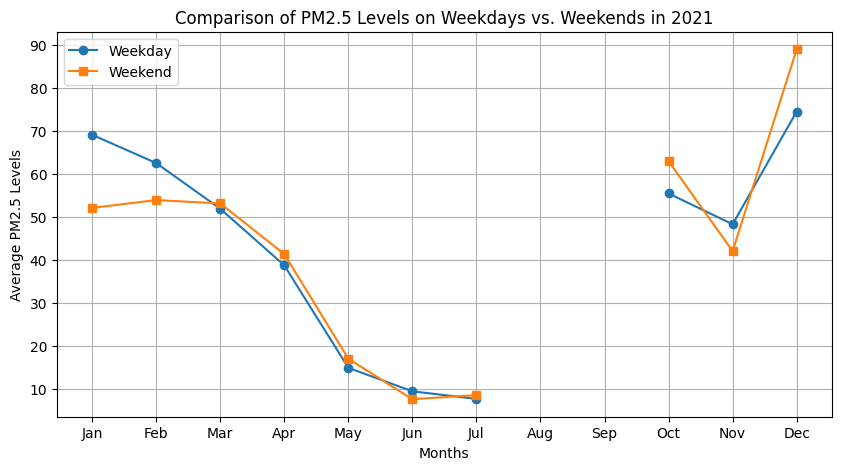

In [50]:
#3a
print("Potential factors for seasonal pollution variation:")
print("1. Winter inversion trapping pollutants.")
print("2. Increased vehicular emissions in colder months.")
print("3. Summer heat increasing photochemical reactions leading to secondary pollutants.")
print("4. Monsoon rains helping to clean air pollutants.")

df_2021 = df[(df['Date'].dt.year == 2021) & 
             (df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]

df_2021['Weekday'] = df_2021['Date'].dt.weekday

df_2021['Category'] = np.where(df_2021['Weekday'] < 5, 'Weekday', 'Weekend')

monthly_avg = df_2021.groupby([df_2021['Date'].dt.month, 'Category'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg['Weekday'], marker='o', label='Weekday')
plt.plot(monthly_avg.index, monthly_avg['Weekend'], marker='s', label='Weekend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Months")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of PM2.5 Levels on Weekdays vs. Weekends in 2021")
plt.legend()
plt.grid()
plt.show()

In [51]:
#3b
city_avg_pm25 = df.groupby('city')['PM2.5'].mean().sort_values(ascending=False)
highest_polluted_city = city_avg_pm25.idxmax()
highest_polluted_city_value = city_avg_pm25.max()
print(f"City with highest average PM2.5 levels: {highest_polluted_city} ({highest_polluted_city_value:.2f} µg/m³)")


toxic_cities = city_avg_pm25[city_avg_pm25 > 100]
print("Cities consistently exceeding safe PM2.5 levels:")
print(toxic_cities)

City with highest average PM2.5 levels: Byrnihat (137.55 µg/m³)
Cities consistently exceeding safe PM2.5 levels:
city
Byrnihat     137.546358
Begusarai    119.810165
Delhi        104.100918
Darbhanga    100.996960
Ghaziabad    100.861468
Name: PM2.5, dtype: float64


Spatio-temporal aggregation [3 marks]


In [2]:
#1
import pandas as pd

df = pd.read_csv(r'C:\Users\MAYANK\Desktop\data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

data_22 = df[df['Timestamp'].dt.year == 2022].copy()
data_22['Month'] = data_22['Timestamp'].dt.month

monsoon, summer = [6, 7, 8, 9], [3, 4, 5]
monsoon_data = data_22[data_22['Month'].isin(monsoon)]
summer_data = data_22[data_22['Month'].isin(summer)]

monsoon_avg = monsoon_data.groupby('state')['PM2.5'].mean()
summer_avg = summer_data.groupby('state')['PM2.5'].mean()

pct_change = ((monsoon_avg - summer_avg) / summer_avg) * 100

print("Percentage change in PM2.5 levels during monsoon vs summer:")
print(pct_change)

max_state = pct_change.abs().idxmax()
max_val = pct_change[max_state]

print(f"\nState with max change: {max_state}")
print(f"Change: {max_val}%")


Percentage change in PM2.5 levels during monsoon vs summer:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West

<Figure size 1200x600 with 0 Axes>

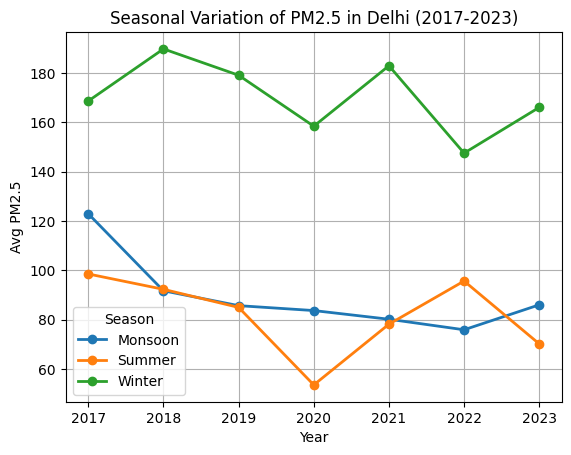

In winter, it has highest PM values mainly due to temperature inversion, low wind speeds, and increased pollution.
Moderate levels due to high temperatures.
Lowest, as rainfall helps particulate matter settle.


In [3]:
#2
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_delhi = df[df['city'] == 'Delhi'].copy()
df_delhi['Year'] = df_delhi['Timestamp'].dt.year
df_delhi['Month'] = df_delhi['Timestamp'].dt.month

def season(m):
    if m in [12, 1, 2]: return 'Winter'
    if m in [3, 4, 5]: return 'Summer'
    return 'Monsoon'

df_delhi['Season'] = df_delhi['Month'].apply(season)
df_delhi = df_delhi[(df_delhi['Year'] >= 2017) & (df_delhi['Year'] <= 2023)]

seasonal_avg = df_delhi.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

plt.figure(figsize=(12, 6))
seasonal_avg.plot(kind='line', marker='o', linewidth=2)
plt.title('Seasonal Variation of PM2.5 in Delhi (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Avg PM2.5')
plt.legend(title='Season')
plt.grid(True)
plt.show()

print("In winter, it has highest PM values mainly due to temperature inversion, low wind speeds, and increased pollution.")
print("Moderate levels due to high temperatures.")
print("Lowest, as rainfall helps particulate matter settle.")

In winter, it has highest PM values mainly due to temperature inversion, low wind speeds, and increased pollution.
Moderate levels due to high temperatures.
Lowest, as rainfall helps particulate matter settle.

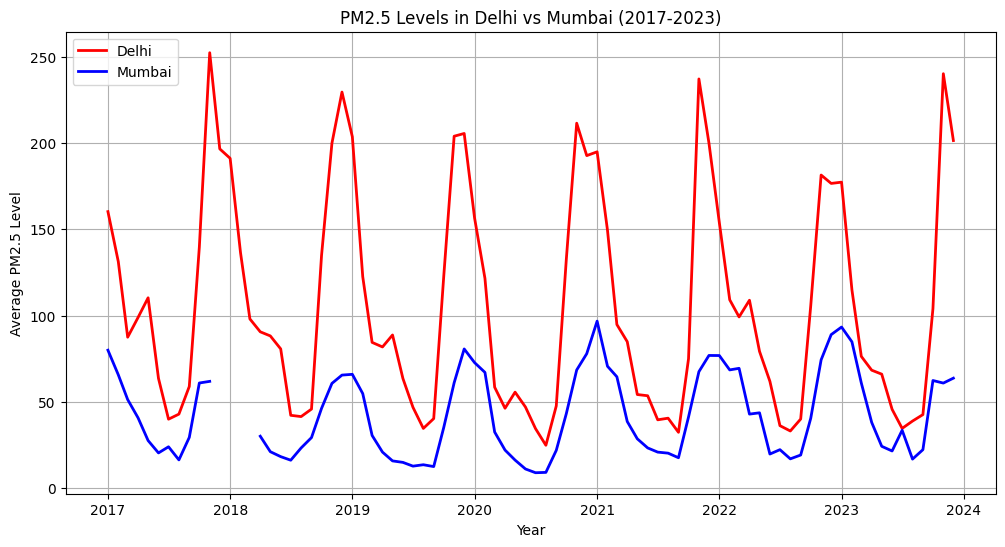

Delhi's PM2.5 standard deviation: 84.93
Mumbai's PM2.5 standard deviation: 40.18
Delhi had more fluctuations in PM2.5 levels.


In [ ]:
#3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter for cities Mumbai and Delhi and restrict data to 2023
df_filtered = df[df['city'].isin(['Delhi', 'Mumbai']) & (df['Timestamp'].dt.year <= 2023)].copy()

# Extract Year-Month for easier grouping
df_filtered['Year-Month'] = df_filtered['Timestamp'].dt.to_period('M')

# Group by Year-Month and city, calculating the mean PM2.5
city_pm25 = df_filtered.groupby(['Year-Month', 'city'])['PM2.5'].mean().unstack()
city_pm25.index = city_pm25.index.to_timestamp()

# Plotting PM2.5 levels
plt.figure(figsize=(12, 6))
plt.plot(city_pm25.index, city_pm25['Delhi'], label='Delhi', color='red', linewidth=2)
plt.plot(city_pm25.index, city_pm25['Mumbai'], label='Mumbai', color='blue', linewidth=2)
plt.title('PM2.5 Levels in Delhi vs Mumbai (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the standard deviation for PM2.5 in both cities
delhi_std = df_filtered[df_filtered['city'] == 'Delhi']['PM2.5'].std()
mumbai_std = df_filtered[df_filtered['city'] == 'Mumbai']['PM2.5'].std()

# Print standard deviations
print(f"Delhi's PM2.5 standard deviation: {delhi_std:.2f}")
print(f"Mumbai's PM2.5 standard deviation: {mumbai_std:.2f}")

# Compare the fluctuations (standard deviation)
if delhi_std > mumbai_std:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")


Population-Based [3 Marks]


In [7]:
#1
import pandas as pd
df_station = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")  #location of csv file data (1).csv
df_population = pd.read_csv(r"C:\Users\MAYANK\Desktop\State_data.csv")  #location of csv file State_data.csv
monitoring_stations_count = df_station['state'].value_counts()
df_monitoring_stations = monitoring_stations_count.reset_index()
df_monitoring_stations.columns = ['state', 'count']
df_merge = pd.merge(df_monitoring_stations, df_population, on='state')
df_merge['monitoring_stations_relative_to_population'] = df_merge['count'] / df_merge['Population']

# Identify the state with the highest number of stations relative to its population
highest_station_index = df_merge['monitoring_stations_relative_to_population'].idxmax()
highest_station = df_merge.loc[highest_station_index]

print(f"State with the highest monitoring stations relative to its population is {highest_station['state']}.")
print(f"Stations relative to population: {highest_station['monitoring_stations_relative_to_population']}")

State with the highest monitoring stations relative to its population is Chandigarh.
Stations relative to population: 0.008245771945615614


C:\Users\MAYANK\AppData\Local\Temp\ipykernel_12304\153325623.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23['Per_Capita_PM2.5'] = df_23['PM2.5'] / df_23['Population']


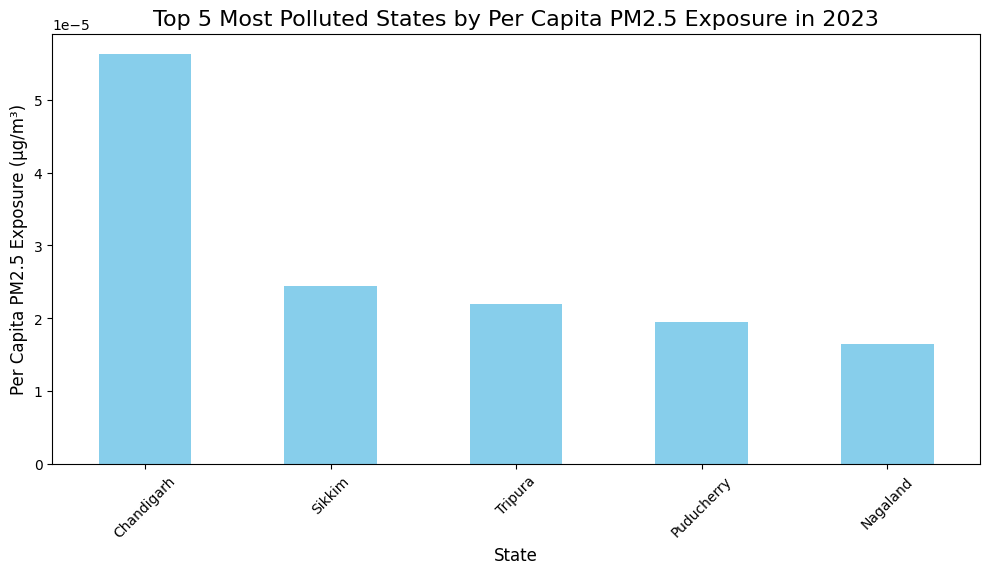

In [8]:
#2
import pandas as pd
import matplotlib.pyplot as plt

df_pm25 = pd.read_csv(r'C:\Users\MAYANK\Desktop\data.csv')
df_pop = pd.read_csv(r'C:\Users\MAYANK\Desktop\State_data.csv')

df_merged = pd.merge(df_pm25, df_pop, on='state')
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp'])

df_23 = df_merged[df_merged['Timestamp'].dt.year == 2023]
df_23['Per_Capita_PM2.5'] = df_23['PM2.5'] / df_23['Population']

state_avg = df_23.groupby('state')['Per_Capita_PM2.5'].mean()
top_5 = state_avg.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Polluted States by Per Capita PM2.5 Exposure in 2023', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Per Capita PM2.5 Exposure (µg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


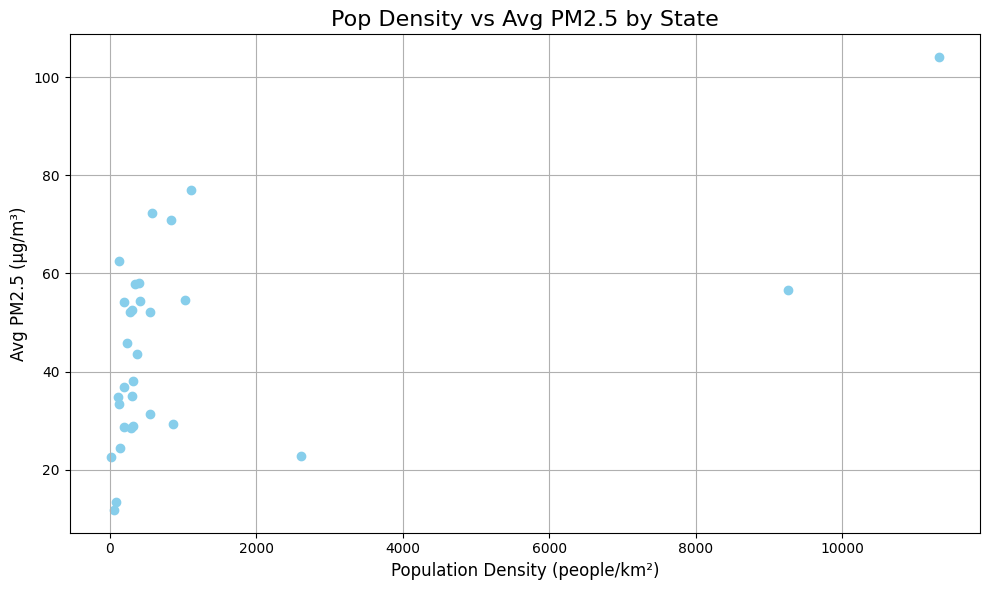

In [9]:
#3
import pandas as pd
import matplotlib.pyplot as plt

df_pm25 = pd.read_csv(r'C:\Users\MAYANK\Desktop\data.csv')
df_pop = pd.read_csv(r'C:\Users\MAYANK\Desktop\State_data.csv')

df_merged = pd.merge(df_pm25, df_pop, on='state')
df_merged['Pop_Density'] = df_merged['Population'] / df_merged['Area (km2)']

state_avg_pm25 = df_merged.groupby('state')['PM2.5'].mean()

df_avg = df_merged.groupby('state').agg({'Pop_Density': 'mean', 'PM2.5': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(df_avg['Pop_Density'], df_avg['PM2.5'], color='skyblue')
plt.title('Pop Density vs Avg PM2.5 by State', fontsize=16)
plt.xlabel('Population Density (people/km²)', fontsize=12)
plt.ylabel('Avg PM2.5 (µg/m³)', fontsize=12)
plt.tight_layout()
plt.grid()
plt.show()


Area Based [3 Marks]


State with highest PM2.5 per sq km: Delhi - 932.81 µg/m³/km²


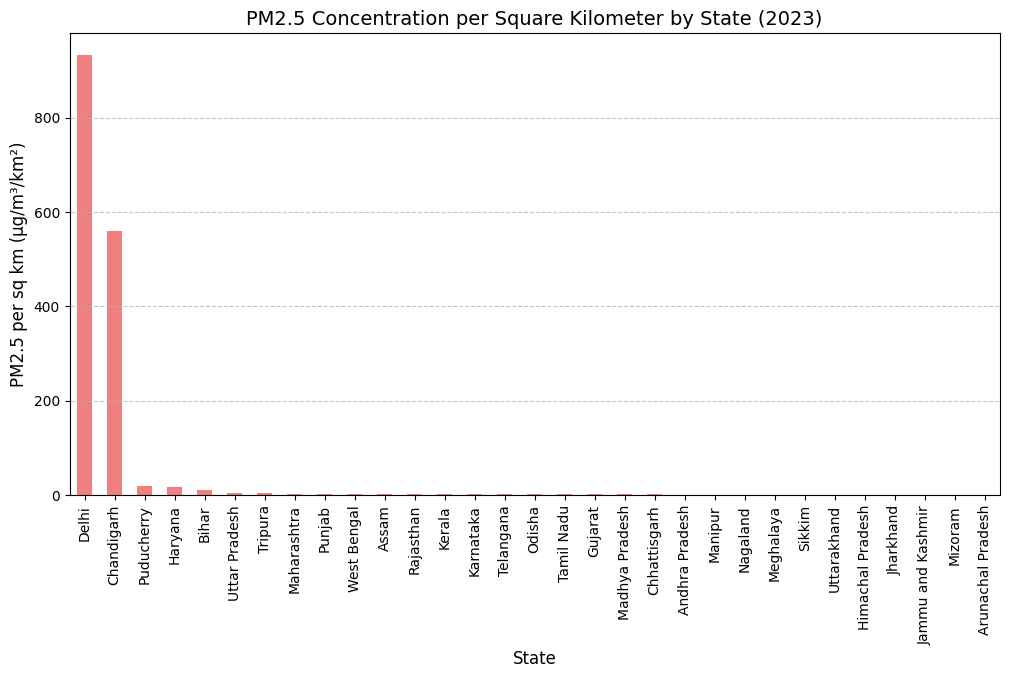

In [10]:
#1
import pandas as pd
import matplotlib.pyplot as plt

df_pm25 = pd.read_csv(r'C:\Users\MAYANK\Desktop\data.csv')
df_pop = pd.read_csv(r'C:\Users\MAYANK\Desktop\State_data.csv')

df_merged = pd.merge(df_pm25, df_pop, on='state')
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp'])

df_23 = df_merged[df_merged['Timestamp'].dt.year == 2023]
state_pm25_total = df_23.groupby('state')['PM2.5'].sum()

state_pm25_density = state_pm25_total / df_pop.set_index('state')['Area (km2)']

most_polluted_state = state_pm25_density.idxmax()
highest_pm25_density = state_pm25_density.max()

print(f"State with highest PM2.5 per sq km: {most_polluted_state} - {highest_pm25_density:.2f} µg/m³/km²")

plt.figure(figsize=(12, 6))
state_pm25_density.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('PM2.5 Concentration per Square Kilometer by State (2023)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 per sq km (µg/m³/km²)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


State with highest station density: Delhi


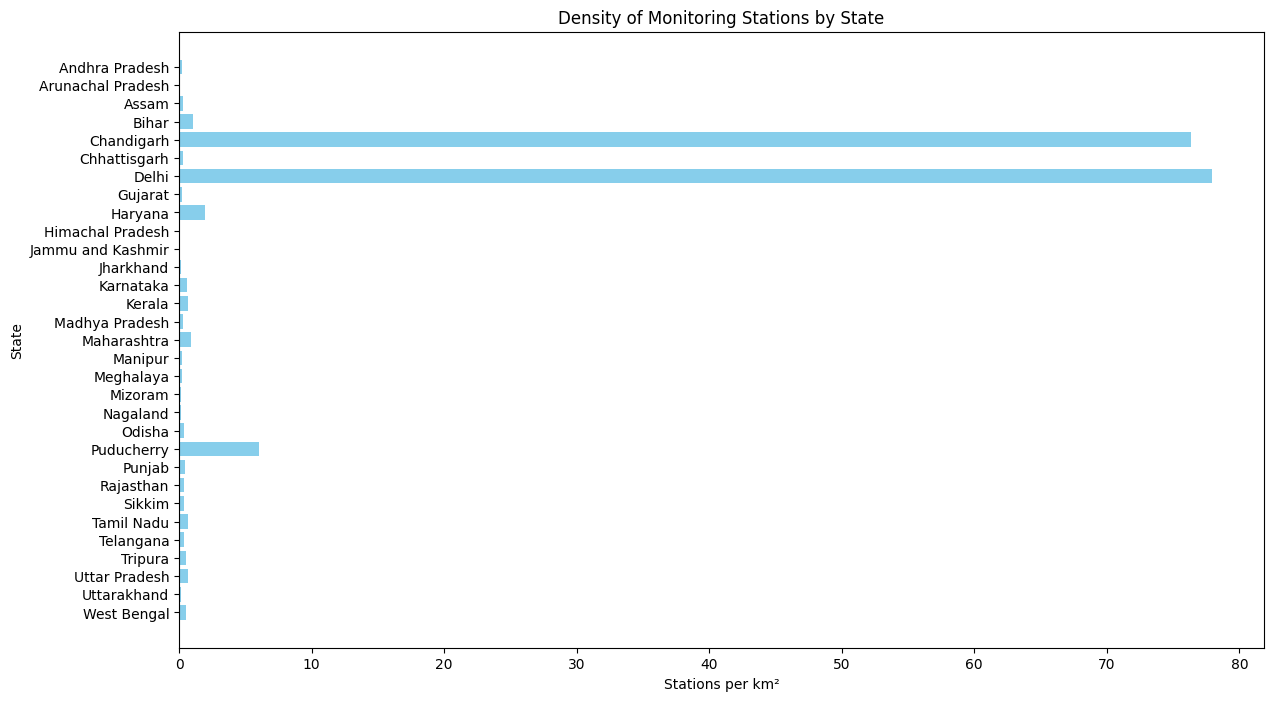

In [11]:
#2
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv(r'C:\Users\MAYANK\Desktop\data.csv')
state_data_df = pd.read_csv(r'C:\Users\MAYANK\Desktop\State_data.csv')

station_counts = data_df.groupby('state').size().reset_index(name='station_count')

merged_df = pd.merge(station_counts, state_data_df, on='state')
merged_df['stations_per_km2'] = merged_df['station_count'] / merged_df['Area (km2)']

highest_density_state = merged_df.loc[merged_df['stations_per_km2'].idxmax()]
print(f"State with highest station density: {highest_density_state['state']}")

plt.figure(figsize=(14, 8))
plt.barh(merged_df['state'], merged_df['stations_per_km2'], color='skyblue')
plt.xlabel('Stations per km²')
plt.ylabel('State')
plt.title('Density of Monitoring Stations by State')
plt.gca().invert_yaxis()
plt.show()


Avg PM2.5 levels for 2021:
            state      PM2.5
0  Madhya Pradesh  47.095952
1     Maharashtra  46.440044
Data with population density:
            state      PM2.5  Population  Area (km2)  pop_density
0  Madhya Pradesh  47.095952    72626809      308252   235.608557
1     Maharashtra  46.440044   112374333      307713   365.192023
Correlation between PM2.5 and population density: -0.9999999999999944


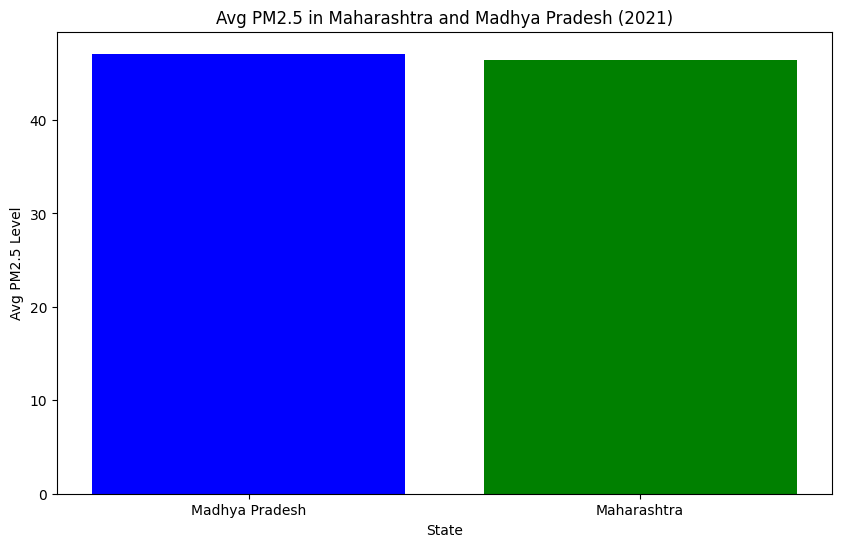

In [12]:
#3
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv(r'C:\Users\MAYANK\Desktop\data.csv')
state_data_df = pd.read_csv(r'C:\Users\MAYANK\Desktop\State_data.csv')

data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])
data_21 = data_df[(data_df['Timestamp'].dt.year == 2021) & 
                  (data_df['state'].isin(['Maharashtra', 'Madhya Pradesh']))]

avg_pm25 = data_21.groupby('state')['PM2.5'].mean().reset_index()
print("Avg PM2.5 levels for 2021:")
print(avg_pm25)

merged_df = pd.merge(avg_pm25, state_data_df, on='state')
merged_df['pop_density'] = merged_df['Population'] / merged_df['Area (km2)']

print("Data with population density:")
print(merged_df)

corr_pm25_pop = merged_df[['PM2.5', 'pop_density']].corr().iloc[0, 1]
print(f"Correlation between PM2.5 and population density: {corr_pm25_pop}")

plt.figure(figsize=(10, 6))
plt.bar(merged_df['state'], merged_df['PM2.5'], color=['blue', 'green'])
plt.xlabel('State')
plt.ylabel('Avg PM2.5 Level')
plt.title('Avg PM2.5 in Maharashtra and Madhya Pradesh (2021)')
plt.show()

Funding Based [3 Marks]


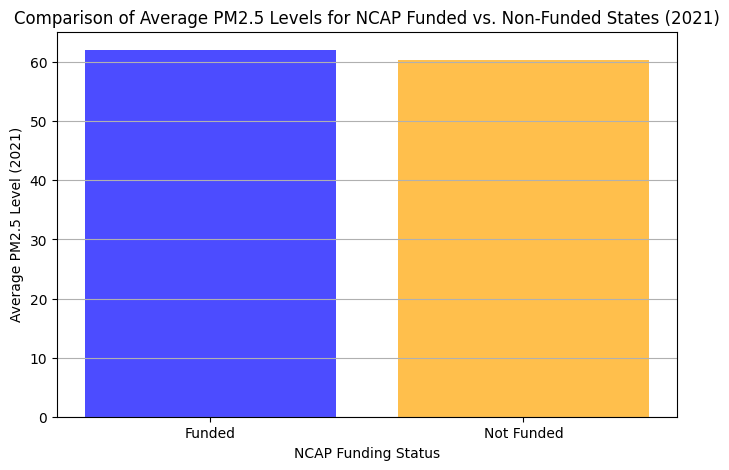

  NCAP_Funded      PM2.5
0      Funded  62.055055
1  Not Funded  60.326211


In [52]:
#1
import pandas as pd
import matplotlib.pyplot as plt

air_quality_df = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv", parse_dates=['Timestamp'])
population_df = pd.read_csv(r"C:\Users\MAYANK\Desktop\State_data.csv")  
ncap_funding_df = pd.read_csv(r"C:\Users\MAYANK\Desktop\NCAP_Funding.csv") 
 
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]
ncap_states = ncap_funding_df['State'].unique()
air_quality_df['NCAP_Funded'] = air_quality_df['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')
pm25_avg = air_quality_df.groupby('NCAP_Funded')['PM2.5'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(pm25_avg['NCAP_Funded'], pm25_avg['PM2.5'], color=['blue', 'orange'], alpha=0.7)
plt.xlabel('NCAP Funding Status')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('Comparison of Average PM2.5 Levels for NCAP Funded vs. Non-Funded States (2021)')
plt.grid(axis='y')
plt.show()

print(pm25_avg)

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_12304\820514094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_air_quality['MonthYear'] = assam_air_quality['Timestamp'].dt.to_period('M')
C:\Users\MAYANK\AppData\Local\Temp\ipykernel_12304\820514094.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  assam_funding[funding_years] = assam_funding[funding_years].replace('-', pd.NA).fillna(0).astype(float)
C:\Users\MAYANK\AppData\Local\Temp\ipykernel_12304\820514094.py:16: SettingWithCopyWarning: 
A value is trying to be set o

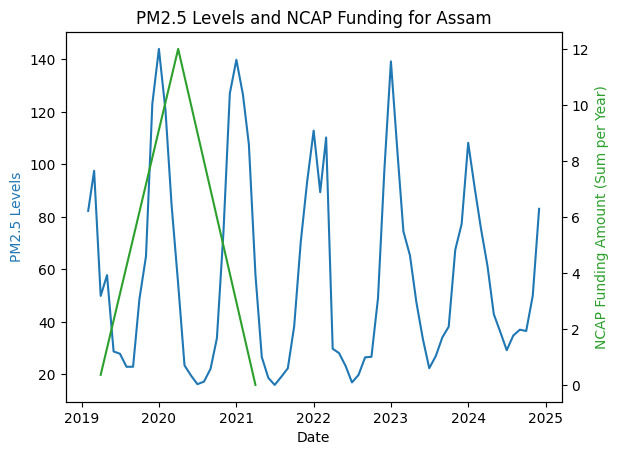

In [ ]:
#2
air_quality_data = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")
funding_data = pd.read_csv(r"C:\Users\MAYANK\Desktop\NCAP_Funding.csv")

air_quality_data['Timestamp'] = pd.to_datetime(air_quality_data['Timestamp'])
assam_air_quality = air_quality_data[air_quality_data['state'] == 'Assam']
assam_funding = funding_data[funding_data['State'] == 'Assam']

# Group air quality data by month and year for PM2.5 average
assam_air_quality['MonthYear'] = assam_air_quality['Timestamp'].dt.to_period('M')
monthly_pm25 = assam_air_quality.groupby('MonthYear')['PM2.5'].mean().reset_index()
monthly_pm25['MonthYear'] = monthly_pm25['MonthYear'].dt.to_timestamp()

# Replace '-' with NaN and fill NaN with 0, then convert to float
funding_years = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']
assam_funding[funding_years] = assam_funding[funding_years].replace('-', pd.NA).fillna(0).astype(float)

# Sum the funding for each year
assam_funding_sum = assam_funding[funding_years].sum(axis=0)

# Create a time series plot
fig, ax1 = plt.subplots()

ax1.plot(monthly_pm25['MonthYear'], monthly_pm25['PM2.5'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='tab:blue')

# Plot funding data on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(['2019-04-01', '2020-04-01', '2021-04-01']), assam_funding_sum, color='tab:green')
ax2.set_ylabel('NCAP Funding Amount (Sum per Year)', color='tab:green')

plt.title('PM2.5 Levels and NCAP Funding for Assam')
plt.show()

*The increase in funding has not affected the genernl trend of the PM2.5 in Assam.*

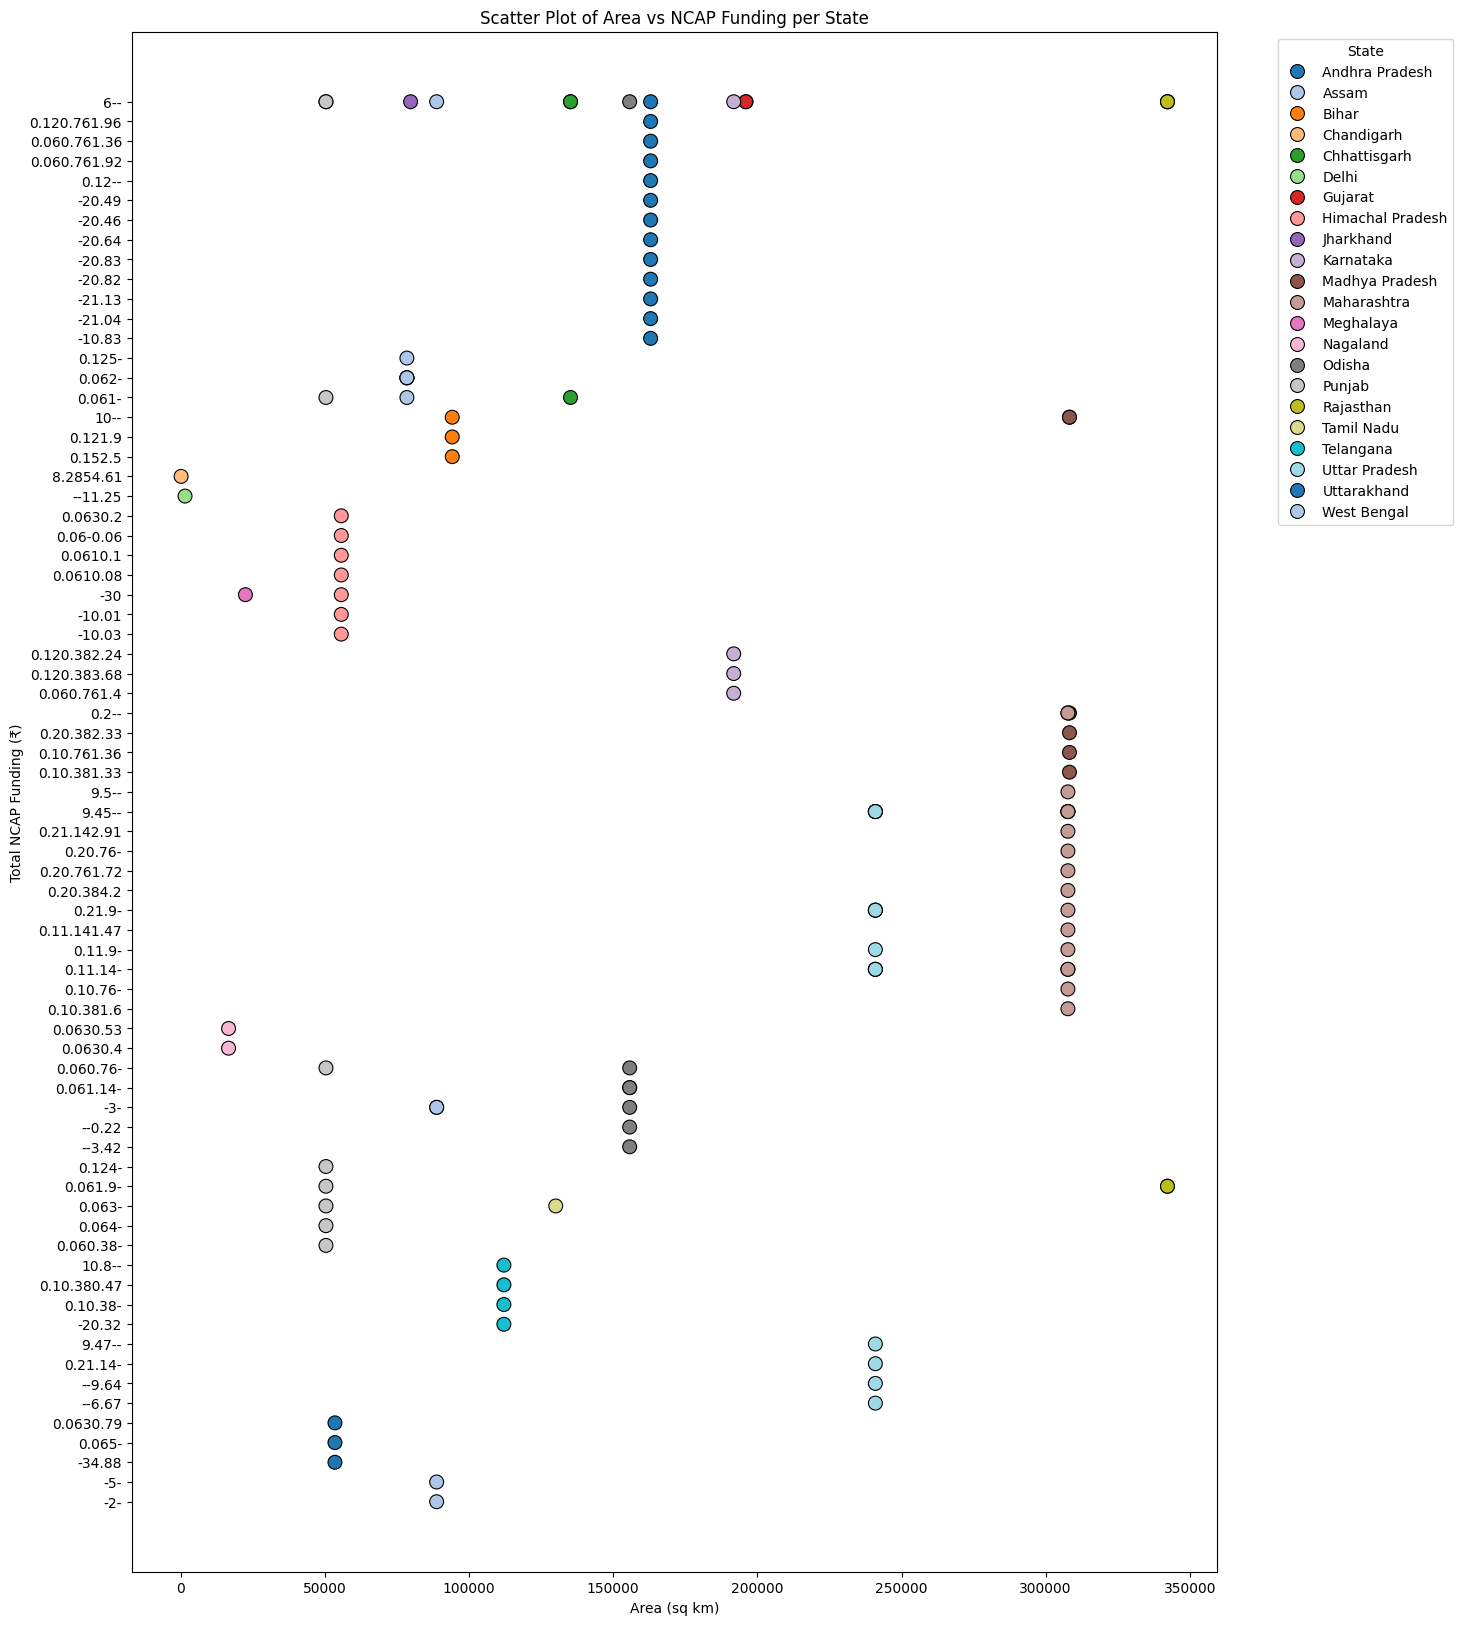

In [34]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

state_data = pd.read_csv(r"C:\Users\MAYANK\Downloads\State_data1.csv") 
ncap_funding_df = pd.read_csv(r"C:\Users\MAYANK\Desktop\NCAP_Funding.csv") 

funding_columns = [col for col in ncap_funding_df.columns if 'FY' in col]
ncap_funding_df['Total_Funding'] = ncap_funding_df[funding_columns].sum(axis=1)
merged_df = pd.merge(ncap_funding_df[['State', 'Total_Funding']], state_data[['State', 'Area (km2)']], on='State')

plt.figure(figsize=(14, 20))
sns.scatterplot(data=merged_df, x='Area (km2)', y='Total_Funding', hue='State', palette='tab20', s=100, edgecolor='black')
plt.xlabel('Area (sq km)')
plt.ylabel('Total NCAP Funding (₹)')
plt.title('Scatter Plot of Area vs NCAP Funding per State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Miscellaneous Questions [5 Marks]


In [35]:
#1
import pandas as pd 
df = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df['Timestamp'].dt.year == 2023]
city_avg_pm25 = df_2023.groupby('city')['PM2.5'].mean()
most_polluted_city = city_avg_pm25.idxmax()
city_data = df_2023[df_2023['city'] == most_polluted_city]
total_days = len(city_data)
hazardous_days = (city_data['PM2.5'] > 300).sum()
hazardous_percentage = (hazardous_days / total_days) * 100
print(f"Most Polluted City in 2023: {most_polluted_city}")
print(f"Percentage of hazardous days (>300 µg/m³): {hazardous_percentage:.2f}%")

Most Polluted City in 2023: Darbhanga
Percentage of hazardous days (>300 µg/m³): 0.82%


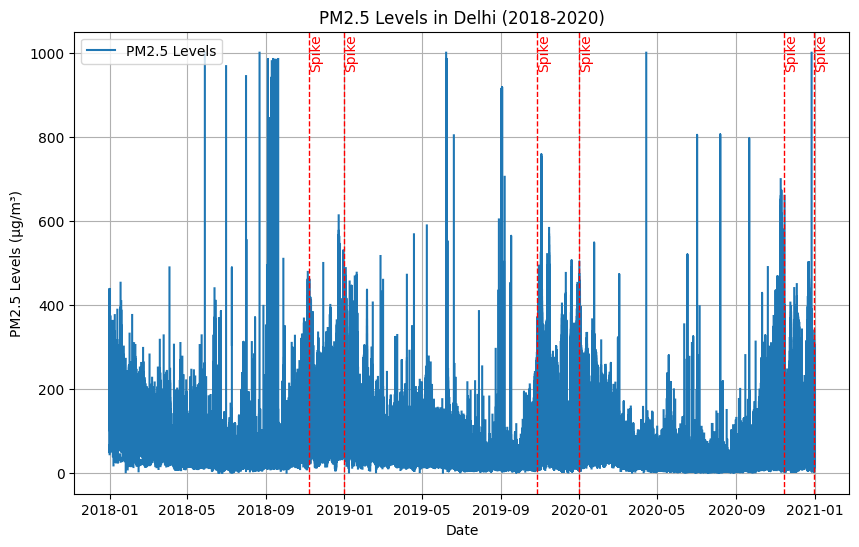

In [36]:
#2
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data[(data['Timestamp'].dt.year >= 2018) & (data['Timestamp'].dt.year <= 2020)]
diwali_dates = ['2018-11-07', '2019-10-27', '2020-11-14']
new_year_dates = ['2018-12-31', '2019-12-31', '2020-12-31']
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['PM2.5'], label='PM2.5 Levels')
for Timestamp in diwali_dates + new_year_dates:
    plt.axvline(pd.to_datetime(Timestamp), color='r', linestyle='--', lw=1)
    plt.text(pd.to_datetime(Timestamp), data['PM2.5'].max(), 'Spike', color='r', rotation=90, verticalalignment='center')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('PM2.5 Levels in Delhi (2018-2020)')
plt.legend()
plt.grid()
plt.show()

State with highest NCAP funding in 2020: Assam


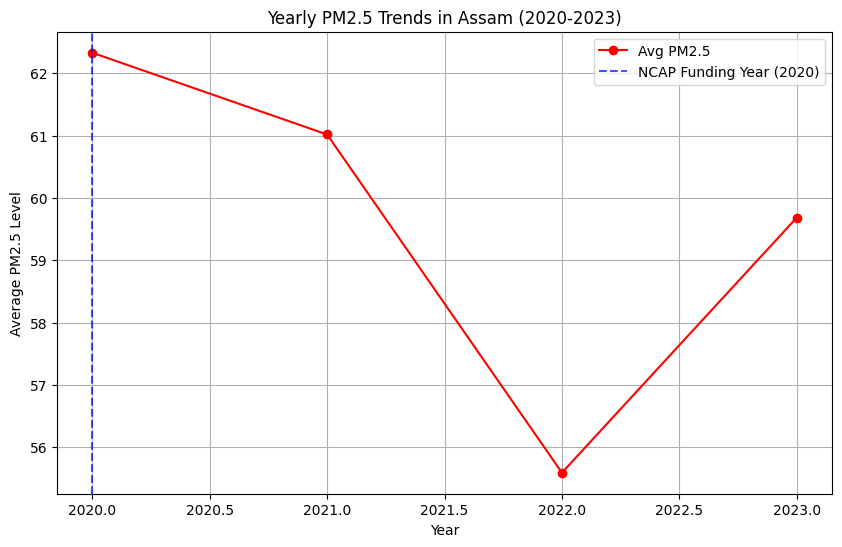

In [37]:
#3
import pandas as pd
import matplotlib.pyplot as plt

air_quality_df = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv", parse_dates=['Timestamp'])
ncap_funding_df = pd.read_csv(r"C:\Users\MAYANK\Desktop\NCAP_Funding.csv")

funding_2020 = ncap_funding_df[['State', 'Amount released during FY 2020-21']].dropna()
funding_2020 = funding_2020.rename(columns={'Amount released during FY 2020-21': 'Funding_2020'})

highest_funded_state = funding_2020.loc[funding_2020['Funding_2020'].idxmax(), 'State']
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")

state_air_quality = air_quality_df[(air_quality_df['state'] == highest_funded_state) &
                                   (air_quality_df['Timestamp'].dt.year.isin([2020, 2021, 2022, 2023]))].copy()
state_air_quality['Year'] = state_air_quality['Timestamp'].dt.year
yearly_avg_pm25 = state_air_quality.groupby('Year')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25['Year'], yearly_avg_pm25['PM2.5'], marker='o', linestyle='-', color='red', label='Avg PM2.5')
plt.axvline(x=2020, color='blue', linestyle='--', alpha=0.7, label='NCAP Funding Year (2020)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title(f'Yearly PM2.5 Trends in {highest_funded_state} (2020-2023)')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

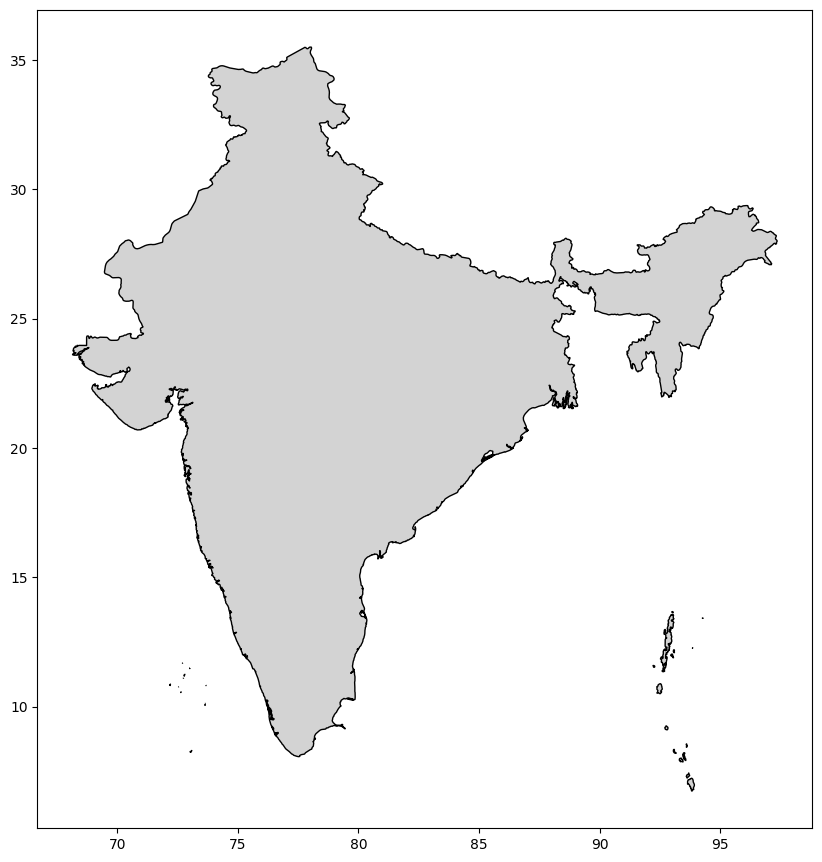

In [64]:
#4
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

world = gpd.read_file(r"C:\Users\MAYANK\Downloads\ne_10m_admin_0_countries.zip")
india = world[world["ADMIN"] == "India"]
sensor_data = pd.read_csv(r"C:\Users\MAYANK\Desktop\data.csv")
if "latitude" in sensor_data.columns and "longitude" in sensor_data.columns:
    gdf_sensors = gpd.GeoDataFrame(
        sensor_data, 
        geometry=gpd.points_from_xy(sensor_data.longitude, sensor_data.latitude),
        crs="EPSG:4326"
    )

    fig, ax = plt.subplots(figsize=(10, 12))
    india.plot(ax=ax, color="lightgray", edgecolor="black")
    gdf_sensors.plot(ax=ax, color="red", markersize=5, alpha=0.7, label="Sensor Locations")
    
    plt.title("Sensor Locations Across India")
    plt.legend()
    plt.show()
else:
    print("Latitude and Longitude columns not found in Data.csv")

Tell us something new [1 Mark]
Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 


City with highest average PM2.5 levels: Byrnihat (137.55 µg/m³)
Cities consistently exceeding safe PM2.5 levels:
city
Byrnihat     137.546358
Begusarai    119.810165
Delhi        104.100918
Darbhanga    100.996960
Ghaziabad    100.861468
Name: PM2.5, dtype: float64